In [ ]:
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist


In [ ]:
f_mnist = fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)


In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [ ]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)

y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
mode_1 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
mode_1.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax'))
# Compiling the model.
mode_1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
training_1 = mode_1.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6006 - loss: 1.3046 - val_accuracy: 0.7592 - val_loss: 0.7546
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7694 - loss: 0.7226 - val_accuracy: 0.7886 - val_loss: 0.6547
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7964 - loss: 0.6423 - val_accuracy: 0.8002 - val_loss: 0.6059
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8085 - loss: 0.5949 - val_accuracy: 0.8098 - val_loss: 0.5777
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8105 - loss: 0.5885 - val_accuracy: 0.8146 - val_loss: 0.5566
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8153 - loss: 0.5570 - val_accuracy: 0.8172 - val_loss: 0.5417
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8249 - loss: 0.5348 - val_accuracy: 0.8211 - val_loss: 0.5293
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8261 - loss: 0.5281 - val_accuracy: 0.

In [ ]:
print(training_1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


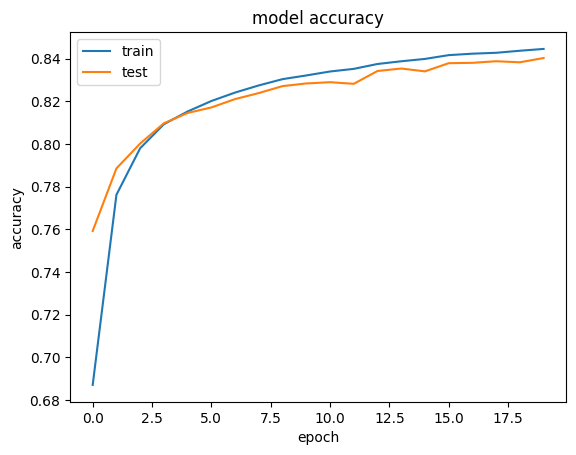

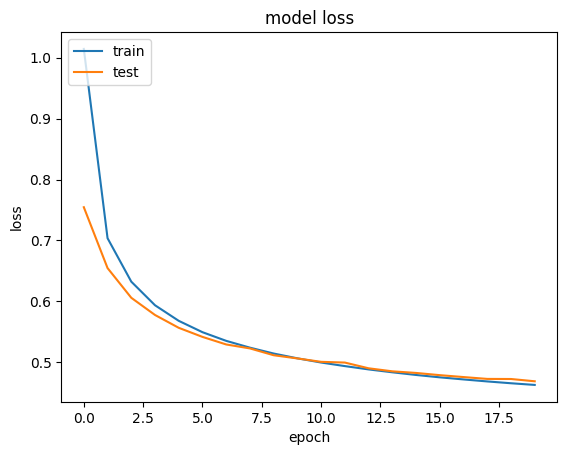

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training_1.history.keys())
# summarize training for accuracy
plt.plot(training_1.history['accuracy'])
plt.plot(training_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training_1.history['loss'])
plt.plot(training_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Most common type of model is a stack of layers
model_12 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_12.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)

# Adding another dense layer:
model_12.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
# After the first layer, you don't need to specify
# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_12.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model_12.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training = model_12.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5433 - loss: 1.3904 - val_accuracy: 0.7665 - val_loss: 0.6745
Epoch 2/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7848 - loss: 0.6388 - val_accuracy: 0.8134 - val_loss: 0.5523
Epoch 3/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8157 - loss: 0.5422 - val_accuracy: 0.8159 - val_loss: 0.5223
Epoch 4/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8281 - loss: 0.5013 - val_accuracy: 0.8282 - val_loss: 0.4894
Epoch 5/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8354 - loss: 0.4718 - val_accuracy: 0.8238 - val_loss: 0.4881
Epoch 6/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8442 - loss: 0.4498 - val_accuracy: 0.8417 - val_loss: 0.4524
Epoch 7/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8486 - loss: 0.4324 - val_accuracy: 0.8474 - val_loss: 0.4360
Epoch 8/100
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8515 - loss: 0.4221 - val_accu

In [ ]:

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_6 = tf.keras.Sequential()
N_hidden = 512
N_hidden_2 = 256
N_hidden_3 = 128
# Adds a densely-connected layer with 64 units to the model:
model_6.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_6.add(Dropout(0.3))

# Adding another dense layer:
model_6.add(Dense(N_hidden_2, name='dense_layer_2', activation='relu'))
model_6.add(Dropout(0.2))

# Adding another dense layer:
model_6.add(Dense(N_hidden_3, name='dense_layer_3', activation='relu'))
model_6.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_6.add(Dense(10, name='dense_layer_4', activation = 'softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model_6.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

training = model_6.fit(X_train, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.7039 - loss: 0.8205 - val_accuracy: 0.8429 - val_loss: 0.4212
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8344 - loss: 0.4587 - val_accuracy: 0.8660 - val_loss: 0.3746
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8543 - loss: 0.4003 - val_accuracy: 0.8596 - val_loss: 0.3718
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8612 - loss: 0.3786 - val_accuracy: 0.8773 - val_loss: 0.3414
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8696 - loss: 0.3607 - val_accuracy: 0.8707 - val_loss: 0.3653
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8695 - loss: 0.3543 - val_accuracy: 0.8751 - val_loss: 0.3472
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8727 - loss: 0.3491 - val_accuracy: 0.8741 - val_loss: 0.3486
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8807 - loss: 0.3242 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


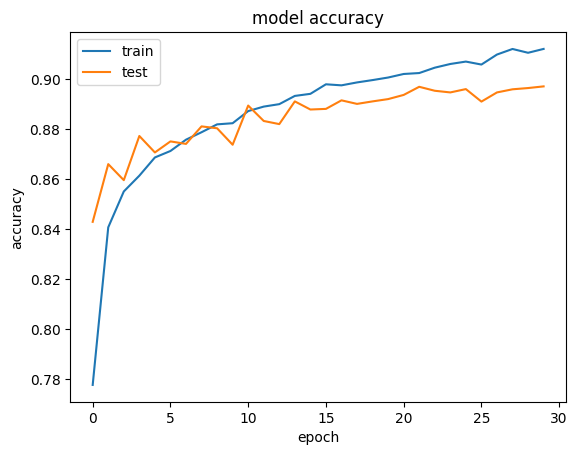

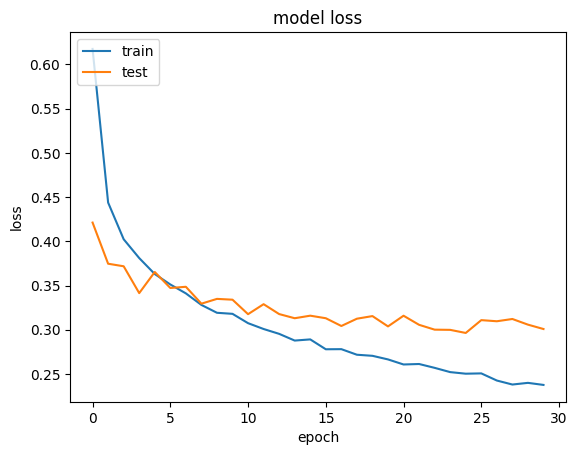

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

ValueError: Cannot take the length of shape with unknown rank.

In [ ]:
from tensorflow.keras.layers import Dropout

#Most common type of model is a stack of layers
model_66 = tf.keras.Sequential()
N_hidden = 512
N_hidden_2 = 256
N_hidden_3 = 128
N_hidden_4 = 64
# Adds a densely-connected layer with 64 units to the model:
model_66.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_66.add(Dropout(0.3))

# Adding another dense layer:
model_66.add(Dense(N_hidden_2, name='dense_layer_2', activation='relu'))
model_66.add(Dropout(0.5))

# Adding another dense layer:
model_66.add(Dense(N_hidden_3, name='dense_layer_3', activation='relu'))
model_66.add(Dropout(0.2))

# Adding another dense layer:
model_66.add(Dense(N_hidden_4, name='dense_layer_4', activation='relu'))
model_66.add(Dropout(0.3))

# Add an output layer with 10 output units (10 different classes):
model_66.add(Dense(10, name='dense_layer_5', activation = 'softmax'))


In [ ]:
model_66.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training1 = model_66.fit(X_train, y_train, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3715 - loss: 1.7037 - val_accuracy: 0.7345 - val_loss: 0.6978
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6955 - loss: 0.8103 - val_accuracy: 0.7795 - val_loss: 0.5607
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7574 - loss: 0.6689 - val_accuracy: 0.8224 - val_loss: 0.4955
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7881 - loss: 0.5938 - val_accuracy: 0.8320 - val_loss: 0.4576
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8097 - loss: 0.5425 - val_accuracy: 0.8424 - val_loss: 0.4368
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8248 - loss: 0.5033 - val_accuracy: 0.8527 - val_loss: 0.4109
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8304 - loss: 0.4880 - val_accuracy: 0.8558 - val_loss: 0.4019
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8405 - loss: 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


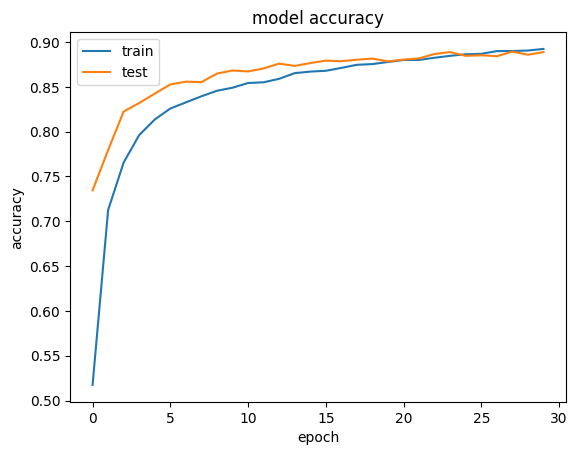

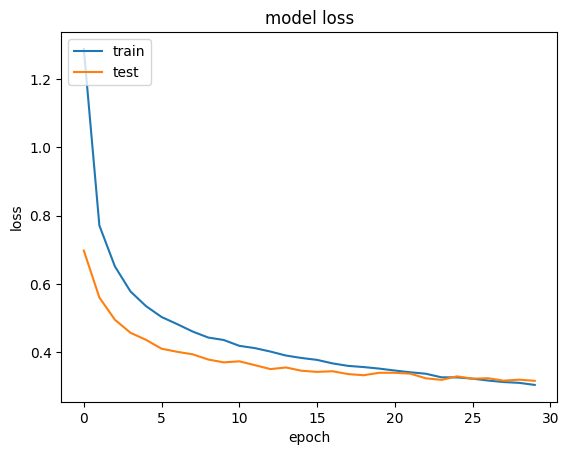

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()